In [1]:
# Some style stuff for the plots

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import matplotlib.style as mplstyle
%matplotlib inline
mplstyle.use('ggplot')

I need a set of distibutions 2 through 600, where each one represents a distribution of open rates such that at the first distribution (2) there can only be open rates of 0%, 50% and 100%. At the second (3) there can only be 0, 33.33%, 66.66% and 100% open rates and so on.

But let's start off simple. Let's simulate just the first distribution first. I need a binomial distribution with an average at .2 with three possible scenarios.

Text(0.5,0,'Questions answered correctly')

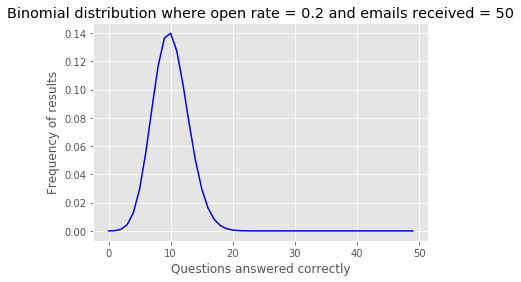

In [50]:
n = 50  # number of emails
p = .2  # hypothesis of open rate
x = np.arange(0, 50)  # x axis limits

dist = stats.binom.pmf(x, n, p)  # Probability mass function, aka the maths

plt.plot(x, dist, color='b')
plt.title(f'Binomial distribution where open rate = {p} and emails received = {n}')
plt.ylabel('Frequency of results')
plt.xlabel('Questions answered correctly')

In [53]:
foo = np.random.binomial(2, .2, 10)

foo

array([1, 1, 0, 0, 0, 0, 0, 1, 2, 0])

In [56]:
# opened emails and open rate

list(zip(foo, foo / 2))

[(1, 0.5),
 (1, 0.5),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (1, 0.5),
 (2, 1.0),
 (0, 0.0)]

In [6]:
def binomial_email_dists(N=100, p=0.2):
    """"""
    df = pd.DataFrame()
    
    for n in range(2,601):
        bar = np.random.binomial(n, p, N)
        df[f'n{n}'] = bar / n
        
    return df

bar = binomial_email_dists()

bar.head()

,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,...,n591,n592,n593,n594,n595,n596,n597,n598,n599,n600
0,0.0,0.000000,0.25,0.0,0.333333,0.142857,0.375,0.333333,0.2,0.090909,...,0.196277,0.177365,0.217538,0.213805,0.181513,0.199664,0.189280,0.182274,0.227045,0.208333
1,0.5,0.000000,0.25,0.2,0.000000,0.428571,0.250,0.333333,0.4,0.272727,...,0.187817,0.180743,0.210793,0.178451,0.181513,0.203020,0.222781,0.235786,0.196995,0.231667
2,0.0,0.666667,0.50,0.4,0.166667,0.142857,0.250,0.333333,0.1,0.272727,...,0.189509,0.199324,0.192243,0.195286,0.211765,0.174497,0.202680,0.224080,0.166945,0.220000
3,0.0,0.333333,0.25,0.2,0.166667,0.142857,0.250,0.222222,0.2,0.181818,...,0.197970,0.168919,0.205734,0.237374,0.201681,0.209732,0.202680,0.193980,0.171953,0.193333
4,0.0,0.333333,0.00,0.2,0.666667,0.142857,0.250,0.000000,0.1,0.272727,...,0.201354,0.202703,0.204047,0.222222,0.218487,0.166107,0.227806,0.200669,0.200334,0.200000


In [7]:
for name in bar.columns[::31]:
    print(name, bar[f'{name}'].mean())

n2 0.25
n33 0.214545454545
n64 0.201875
n95 0.199578947368
n126 0.195396825397
n157 0.202420382166
n188 0.187872340426
n219 0.202100456621
n250 0.20344
n281 0.199928825623
n312 0.201955128205
n343 0.202186588921
n374 0.200561497326
n405 0.19762962963
n436 0.197224770642
n467 0.200728051392
n498 0.199036144578
n529 0.200945179584
n560 0.2025
n591 0.198815566836


Ok so that's the kind of data frame I want. Kind of. This is too neat. There are exactly 100 instances at each level. The real data will not look like that. I'll need dummy data. How do I do that? Ok so each record will have a few key statistics

1. ID
1. Number of emails received
1. Number of emails opened
1. Open rate

So I can say each person gets a number of emails. For example some random number between 2 and 600. The number of emails opened is an np.random.binom number based on the number of emails received.

Ok how do I generate the random number and the binomial open rate?

In [8]:
a = np.random.randint(0, 600)
b = np.random.binomial(a, .2)

print(a, b)

400 74


In [45]:
# Or better yet, let's do a chi square distribution

pd.DataFrame(np.random.chisquare(50, 1000)).describe()

# nice.

,0
count,1000.000000
mean,49.965007
std,10.240227
min,24.933874
25%,42.608595
50%,48.931997
75%,56.190210
max,90.313343


In [51]:
def sim_data(mu=50, N=50):
    
    def emails_opened(x):
        return np.random.binomial(x, .2)
    
    df = pd.DataFrame()
    
    df['received'] = np.floor(np.random.chisquare(mu, N))
    df['opens'] = df['received'].apply(emails_opened)
    df['rate'] = df['opens']/df['received']
    
    return df

In [102]:
amt = 500_000

foo = sim_data(N=amt)

foo.head()

,received,opens,rate
0,43.0,10,0.232558
1,49.0,12,0.244898
2,53.0,10,0.188679
3,41.0,1,0.024390
4,48.0,11,0.229167


In [103]:
foo['received'].describe()

count    500000.000000
mean         49.492160
std           9.990512
min          14.000000
25%          42.000000
50%          49.000000
75%          56.000000
max         110.000000
Name: received, dtype: float64

In [104]:
spots = [20, 50, 100]

for i in spots:
    print(i, foo['opens'][foo['received'] == i].count())

20 24
50 19658
100 3


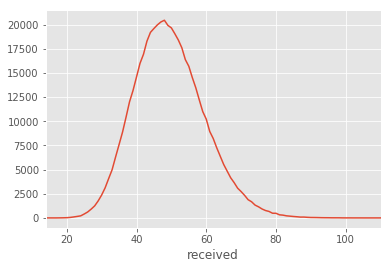

In [105]:
foo['opens'].groupby(foo['received']).count().plot()

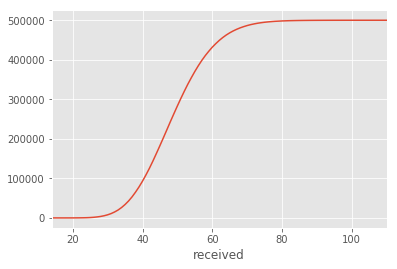

In [110]:
foo['opens'].groupby(foo['received']).count().cumsum().plot()

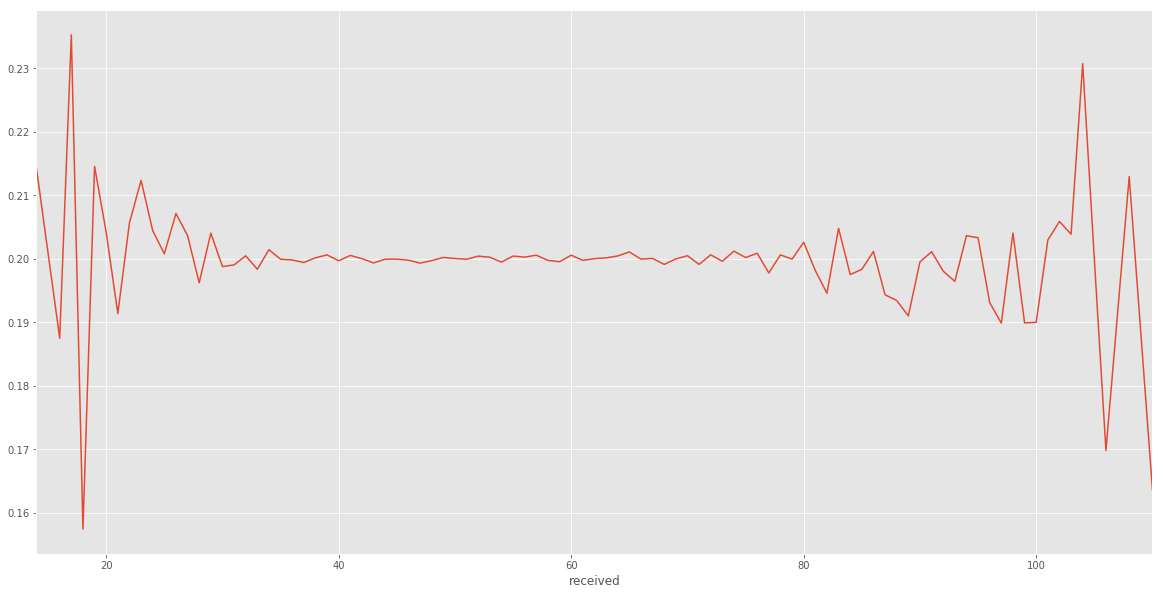

In [106]:
foo['rate'].groupby(foo['received']).mean().plot(figsize=(20,10))